In [1]:
import pybamm
import matplotlib.pyplot as plt

In [2]:
models = [
    pybamm.lithium_ion.SPM(name="SPM"),
    pybamm.lithium_ion.SPMe(name="SPMe"),
    pybamm.lithium_ion.DFN(name="DFN"),
]

In [3]:
param = pybamm.ParameterValues(chemistry="Chen2020")

In [4]:
sims = []
C_rate = 2
t_end = 1e10
for model in models:
    sim = pybamm.Simulation(model, parameter_values=param, C_rate=C_rate)
    sim.solve([0, 3700 / C_rate])
    sims.append(sim)
    t_end = min(t_end, sim.solution["Time [s]"].entries[-1])

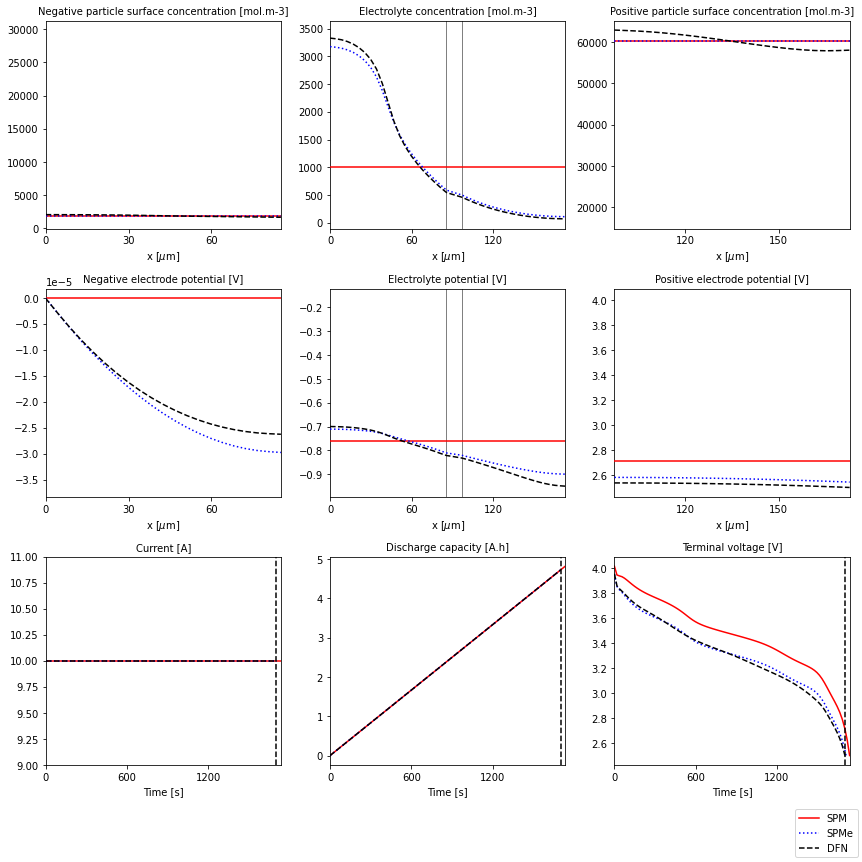

In [5]:
plot = pybamm.QuickPlot(
    sims,
    output_variables=[
        "Negative particle surface concentration [mol.m-3]",
        "Electrolyte concentration [mol.m-3]",
        "Positive particle surface concentration [mol.m-3]",
        "Negative electrode potential [V]",
        "Electrolyte potential [V]",
        "Positive electrode potential [V]",
        "Current [A]",
        "Discharge capacity [A.h]",
        "Terminal voltage [V]",
    ],
    time_unit="seconds",
    figsize=(12, 12))
plot.plot(t_end)
plot.fig.savefig("img/compare_models_internal_states.png", dpi=300)

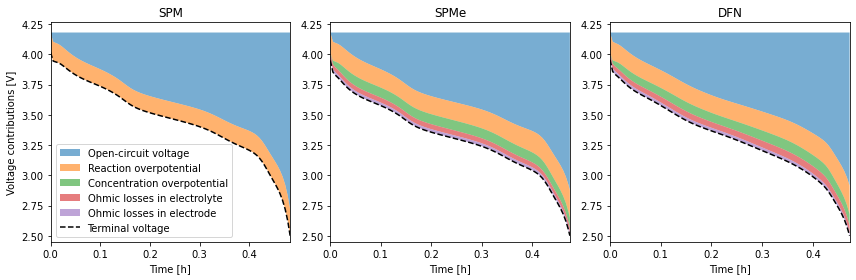

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
show_legend = False
for ax, sim in zip(axs, sims):
    pybamm.plot_voltage_components(sim.solution, show_legend=show_legend, ax=ax)
    show_legend = False
    ax.set_title(sim.model.name)

axs[0].set_ylabel("Voltage contributions [V]")
labels = [
    "Open-circuit voltage",
    "Reaction overpotential",
    "Concentration overpotential",
    "Ohmic losses in electrolyte",
    "Ohmic losses in electrode",
    "Terminal voltage",
]
leg = axs[0].legend(labels, loc="lower left", frameon=True)
fig.tight_layout()
fig.savefig("img/compare_models_voltage.png", dpi=300)